In [12]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from tensorflow.keras.layers import Dense
from keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
import tensorflow as tf


from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
data = pd.read_csv("HIGGS_train.csv",header=None, names=["Prediction","lepton pT", "lepton eta", "lepton phi", "missing energy magnitude", "missing energy phi", "jet 1 pt", "jet 1 eta", "jet 1 phi", "jet 1 b-tag", "jet 2 pt", "jet 2 eta", "jet 2 phi","jet 2 b-tag", "jet 3 pt", "jet 3 eta", "jet 3 phi", "jet 3 b-tag", "jet 4 pt", "jet 4 eta", "jet 4 phi", "jet 4 b-tag", "m jj","m jjj", "m lv", "m jlv", "m bb", "m wbb", "m wwbb"])

print(data)

C:\Users\reemh\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (8,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Prediction                600000 non-null  float64
 1   lepton pT                 600000 non-null  float64
 2   lepton eta                600000 non-null  float64
 3   lepton phi                600000 non-null  float64
 4   missing energy magnitude  600000 non-null  float64
 5   missing energy phi        600000 non-null  float64
 6   jet 1 pt                  600000 non-null  float64
 7   jet 1 eta                 600000 non-null  float64
 8   jet 1 phi                 600000 non-null  object 
 9   jet 1 b-tag               600000 non-null  float64
 10  jet 2 pt                  600000 non-null  float64
 11  jet 2 eta                 600000 non-null  float64
 12  jet 2 phi                 600000 non-null  float64
 13  jet 2 b-tag               600000 non-null  f

In [15]:
data.shape

(600000, 29)

In [16]:
data.describe()

,Prediction,lepton pT,lepton eta,lepton phi,missing energy magnitude,missing energy phi,jet 1 pt,jet 1 eta,jet 1 b-tag,jet 2 pt,...,jet 4 pt,jet 4 eta,jet 4 phi,m jj,m jjj,m lv,m jlv,m bb,m wbb,m wwbb
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,...,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,0.529287,0.992486,-0.000112,0.000166,0.998019,-0.001156,0.990147,-0.002193,1.000380,0.992593,...,0.986215,-0.000308,-0.002128,1.034048,1.024418,1.050635,1.010129,0.973341,1.033155,0.959835
std,0.499142,0.565045,1.007858,1.005480,0.599282,1.006754,0.474625,1.010296,1.026463,0.500731,...,0.505671,1.008151,1.005563,0.669431,0.378086,0.164443,0.398453,0.524885,0.364497,0.313073
min,0.000000,0.275000,-2.430000,-1.740000,0.000626,-1.740000,0.139000,-2.970000,0.000000,0.189000,...,0.365000,-2.500000,-1.740000,0.107000,0.245000,0.092200,0.157000,0.048100,0.303000,0.351000
25%,0.000000,0.591000,-0.737000,-0.870000,0.577000,-0.873000,0.679000,-0.689000,0.000000,0.656000,...,0.618000,-0.715000,-0.872000,0.791000,0.846000,0.986000,0.768000,0.674000,0.819000,0.770000
50%,1.000000,0.854000,-0.001030,0.002640,0.891000,-0.001920,0.894000,-0.003000,1.090000,0.890000,...,0.868000,-0.000461,-0.005810,0.895000,0.950000,0.990000,0.917000,0.873000,0.947000,0.872000
75%,1.000000,1.240000,0.738000,0.870000,1.290000,0.872000,1.170000,0.685000,2.170000,1.200000,...,1.220000,0.715000,0.868000,1.020000,1.080000,1.020000,1.140000,1.140000,1.140000,1.060000
max,1.000000,8.710000,2.430000,1.740000,9.900000,1.740000,8.380000,2.970000,2.170000,11.600000,...,11.600000,2.500000,1.740000,22.300000,11.600000,5.920000,10.500000,13.700000,8.430000,6.260000


<AxesSubplot:>

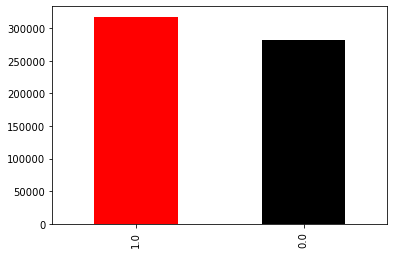

In [17]:
data.Prediction.value_counts().plot(kind="bar", color=["red", "black"])

In [18]:
# Checking for messing values
data.isna().sum()

Prediction                  0
lepton pT                   0
lepton eta                  0
lepton phi                  0
missing energy magnitude    0
missing energy phi          0
jet 1 pt                    0
jet 1 eta                   0
jet 1 phi                   0
jet 1 b-tag                 0
jet 2 pt                    0
jet 2 eta                   0
jet 2 phi                   0
jet 2 b-tag                 0
jet 3 pt                    0
jet 3 eta                   0
jet 3 phi                   0
jet 3 b-tag                 1
jet 4 pt                    0
jet 4 eta                   0
jet 4 phi                   0
jet 4 b-tag                 0
m jj                        0
m jjj                       0
m lv                        0
m jlv                       0
m bb                        0
m wbb                       0
m wwbb                      0
dtype: int64

In [19]:
#deleting row that contains the missing data 
data = data.dropna()
print(data)

        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [20]:
# Drop duplicates
data =data.drop_duplicates()

print(data)

        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [21]:
# Find columns with non-float data types
non_float_columns = data.select_dtypes(exclude=['float']).columns.tolist()

# Convert non-float columns to numeric data type
for col in non_float_columns:
    data.loc[:, col] = pd.to_numeric(data[col], errors='coerce')

# Find rows with non-float values
nonfloat_rows = data[data.isnull().any(axis=1)]

# Print the row numbers and column names with non-float values
for index, row in nonfloat_rows.iterrows():
    nonfloat_columns = row.index[row.isnull()].tolist()
    print(f"Row {index} contains non-float values in columns: {nonfloat_columns}")
    
# Delete rows with non-float values

data.drop(nonfloat_rows.index, inplace=True)

# Print the cleaned data
print(data)

Row 261026 contains non-float values in columns: ['jet 1 phi']
Row 490959 contains non-float values in columns: ['jet 4 b-tag']
Row 490960 contains non-float values in columns: ['jet 4 b-tag']
        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327             

In [22]:
# Add new features
data['Delta phi jet 1 jet 2'] = abs(data['jet 1 phi'] - data['jet 2 phi'])

# Feature Ratios
data['m_bb_m_wwbb_ratio'] = data['m bb'] / data['m wwbb']
data['m_wbb_m_jlv_ratio'] = data['m wbb'] / data['m jlv']


# Statistical Features
data['m_bb_m_wwbb_std'] = data[['m bb', 'm wwbb', 'm wbb']].std(axis=1)

print(data)

        Prediction  lepton pT  lepton eta  lepton phi  \
0              1.0      0.869      -0.635       0.226   
1              1.0      0.908       0.329       0.359   
2              1.0      0.799       1.470      -1.640   
3              0.0      1.340      -0.877       0.936   
4              1.0      1.110       0.321       1.520   
...            ...        ...         ...         ...   
599995         0.0      0.680       0.223      -0.757   
599996         1.0      1.610      -1.620       0.212   
599997         1.0      1.070       0.364       0.344   
599998         1.0      1.180      -0.173      -1.460   
599999         0.0      0.771      -0.133      -1.020   

        missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                          0.327              -0.690     0.754     -0.249   
1                          1.500              -0.313     1.100     -0.558   
2                          0.454               0.426     1.100      1.280   
3      

In [23]:
# Create a copy of the original data to store augmented data
augmented_data = data.copy()

# Perform bootstrapping to generate augmented data
n_bootstraps = 10  # Number of bootstraps
n_samples = len(data)  # Number of samples in the original dataset

for i in range(n_bootstraps):
    bootstrap_indices = np.random.randint(0, n_samples, size=n_samples)  # Generate random indices for bootstrapping
    bootstrap_data = data.iloc[bootstrap_indices]  # Select data samples based on bootstrap indices
    augmented_data = pd.concat([augmented_data, bootstrap_data], ignore_index=True)  # Concatenate augmented data with original data

print(augmented_data)

         Prediction  lepton pT  lepton eta  lepton phi  \
0               1.0      0.869      -0.635      0.2260   
1               1.0      0.908       0.329      0.3590   
2               1.0      0.799       1.470     -1.6400   
3               0.0      1.340      -0.877      0.9360   
4               1.0      1.110       0.321      1.5200   
...             ...        ...         ...         ...   
6592933         1.0      1.290       0.595      0.8640   
6592934         1.0      0.542       0.359     -0.8570   
6592935         1.0      0.800      -0.668      0.9030   
6592936         0.0      1.290      -0.323      0.0981   
6592937         0.0      0.599       0.314     -1.1400   

         missing energy magnitude  missing energy phi  jet 1 pt  jet 1 eta  \
0                           0.327            -0.69000     0.754    -0.2490   
1                           1.500            -0.31300     1.100    -0.5580   
2                           0.454             0.42600     1.100     1

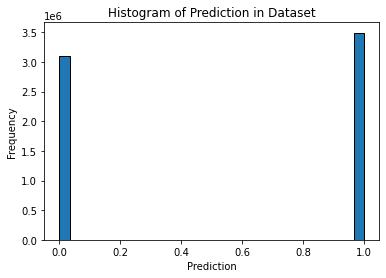

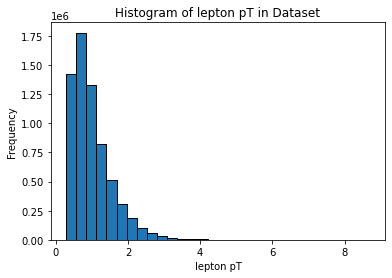

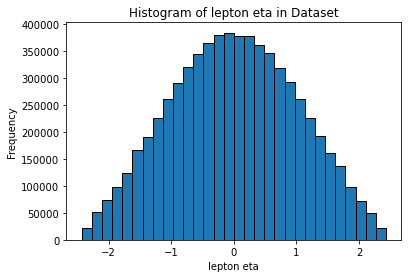

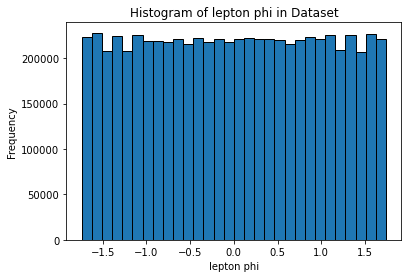

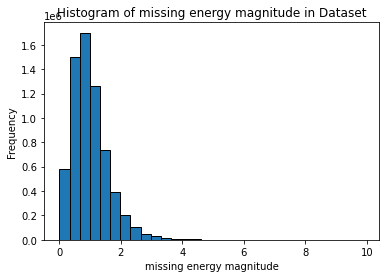

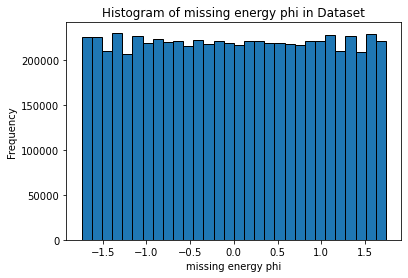

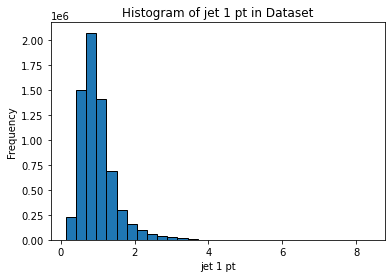

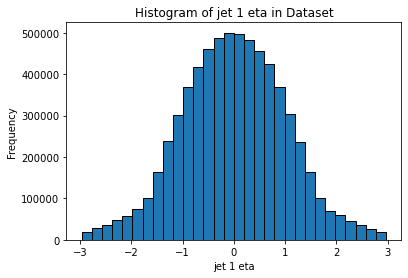

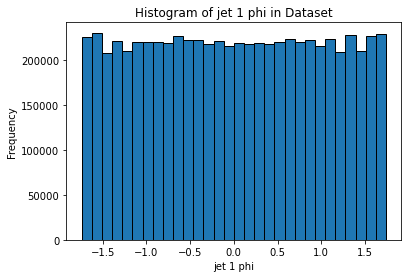

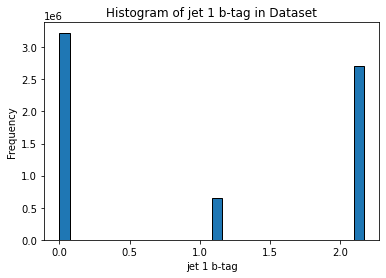

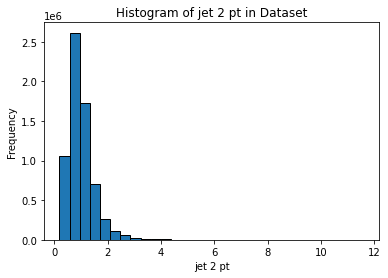

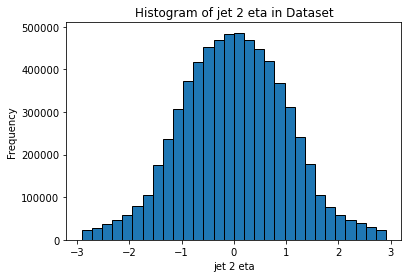

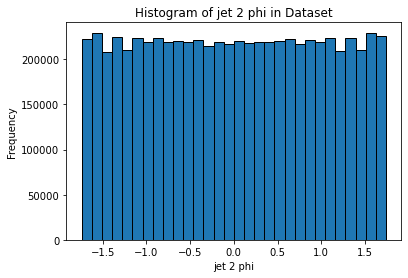

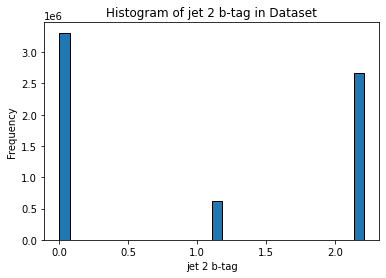

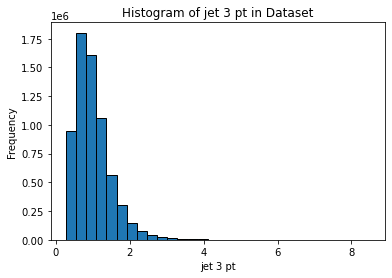

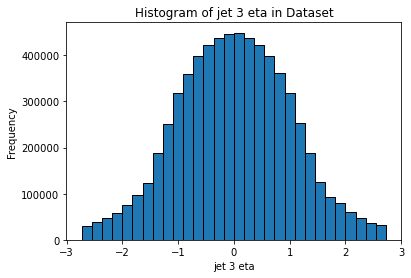

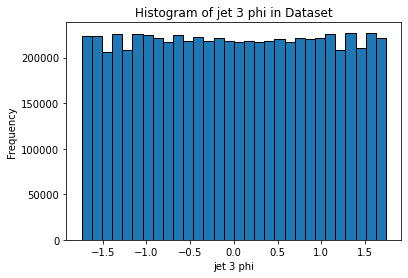

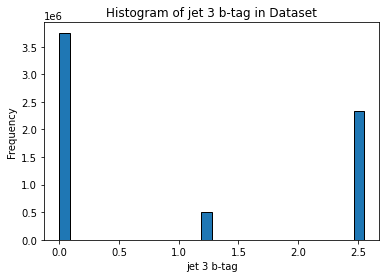

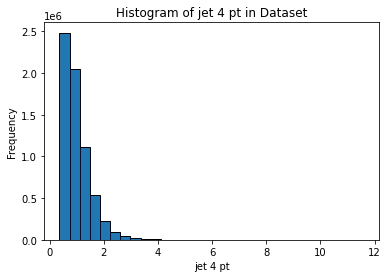

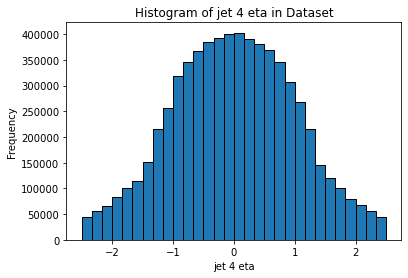

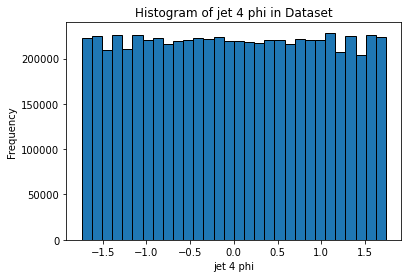

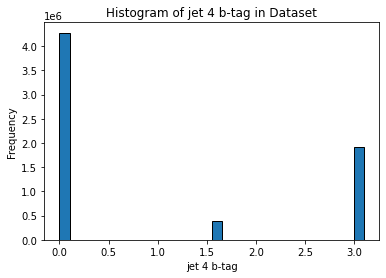

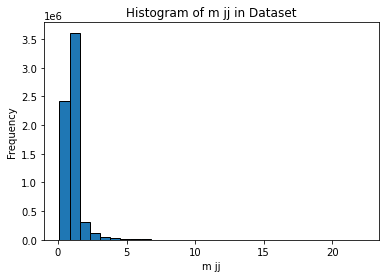

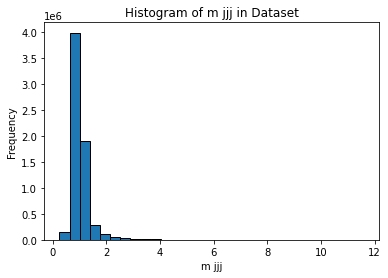

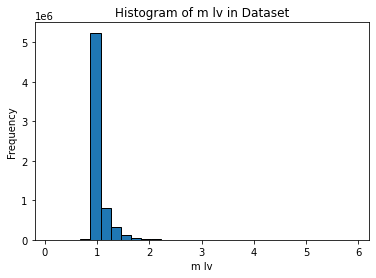

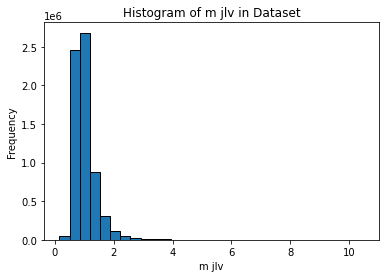

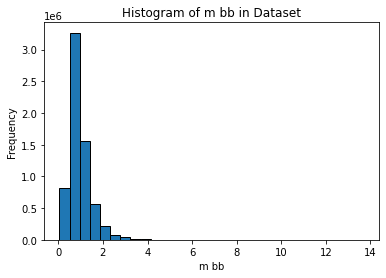

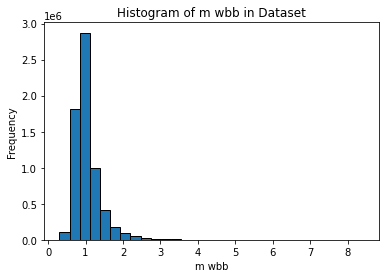

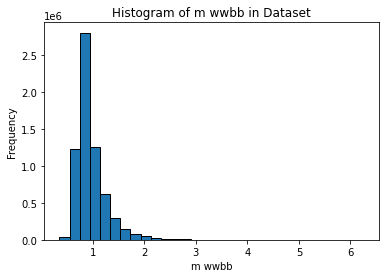

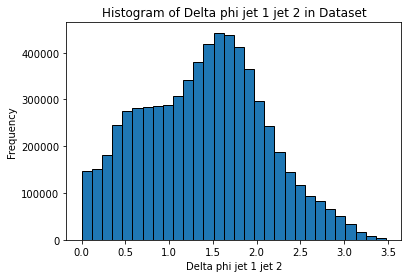

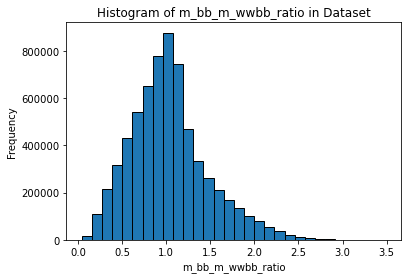

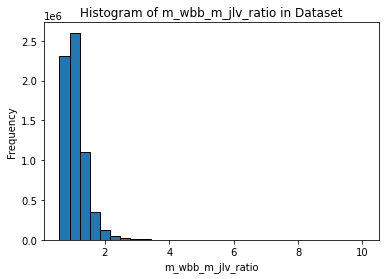

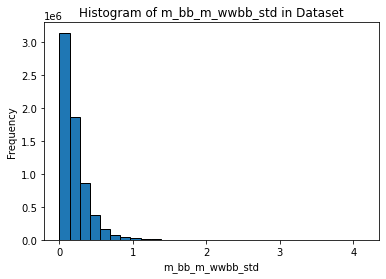

In [24]:
# Get column names
column_names = augmented_data.columns

# Loop through each column and plot histogram
for column_name in column_names:
    column_data = augmented_data[column_name]
    plt.hist(column_data, bins=30, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name} in Dataset')
    plt.show()

In [25]:
# Extract the target variable from the "Prediction" column
target_variable = augmented_data["Prediction"]

# Calculate correlation coefficients
correlation = augmented_data.corrwith(target_variable)

# Sort features by absolute correlation with the target variable
correlation_with_target = correlation.abs().sort_values(ascending=False)

# Print the feature importances based on correlation
print(correlation_with_target)

Prediction                  1.000000
m_bb_m_wwbb_std             0.193268
m bb                        0.151693
m wwbb                      0.124766
missing energy magnitude    0.098929
m_bb_m_wwbb_ratio           0.078610
m wbb                       0.066057
jet 1 pt                    0.054947
jet 2 b-tag                 0.049069
lepton pT                   0.048016
jet 4 pt                    0.035572
Delta phi jet 1 jet 2       0.032290
m jlv                       0.030815
m_wbb_m_jlv_ratio           0.030227
jet 3 b-tag                 0.024852
m jjj                       0.023352
jet 2 pt                    0.020234
jet 4 b-tag                 0.014527
jet 3 pt                    0.013569
m lv                        0.011981
m jj                        0.011069
jet 1 b-tag                 0.009461
jet 2 phi                   0.002354
missing energy phi          0.001963
jet 1 eta                   0.001830
jet 2 eta                   0.001388
jet 3 phi                   0.001341
l

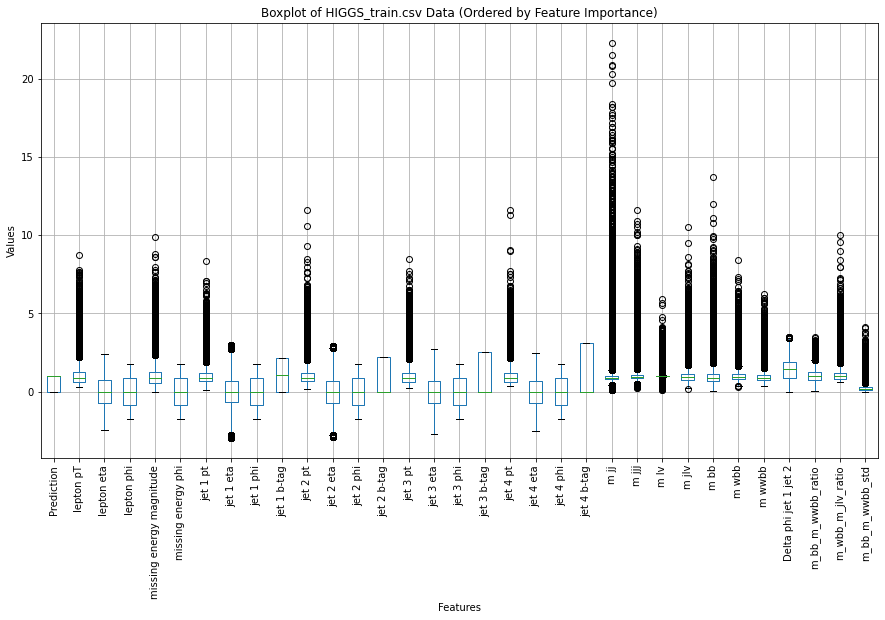

In [26]:
# Get the sorted feature importances as a list
sorted_features = correlation_with_target.index.tolist()

# Reorder the columns of the data DataFrame based on the sorted feature importances
augmented_data = augmented_data[sorted_features]

# Create a boxplot of the reordered columns
data.boxplot(rot=90, figsize=(15, 8)) # You can adjust the rotation and figure size as per your preference
plt.title("Boxplot of HIGGS_train.csv Data (Ordered by Feature Importance)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

In [27]:
# Define a function to remove outliers using IQR for each column separately
def remove_outliers_iqr_per_column(augmented_data, iqr_multiplier=1.5):
    data_no_outliers = augmented_data.copy()  # Create a copy of the data to avoid modifying the original data
    for col in augmented_data.columns:  # Loop through each column
        Q1 = augmented_data[col].quantile(0.15)  # Calculate Q1 (25th percentile) for the column
        Q3 = augmented_data[col].quantile(0.85)  # Calculate Q3 (75th percentile) for the column
        IQR = Q3 - Q1  # Calculate IQR for the column
        lower_bound = Q1 - iqr_multiplier * IQR  # Calculate lower bound for the column
        upper_bound = Q3 + iqr_multiplier * IQR  # Calculate upper bound for the column
        outliers = augmented_data[col][((augmented_data[col] < lower_bound) | (augmented_data[col] > upper_bound))]  # Identify outliers for the column
        data_no_outliers = data_no_outliers.loc[~((augmented_data[col] < lower_bound) | (augmented_data[col] > upper_bound))]  # Remove outliers for the column
    return data_no_outliers

# Remove outliers using IQR for each column separately
data_no_outliers_iqr_per_column = remove_outliers_iqr_per_column(augmented_data)

In [28]:
# extract the features and target variable
X =data_no_outliers_iqr_per_column.iloc[:, 1:].values
y = data_no_outliers_iqr_per_column.iloc[:, 0].values
print(X.shape)
print(y)

(5513451, 32)
[1. 1. 1. ... 1. 0. 0.]


In [29]:
#shuffle the data
X, y = shuffle(X, y, random_state=0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

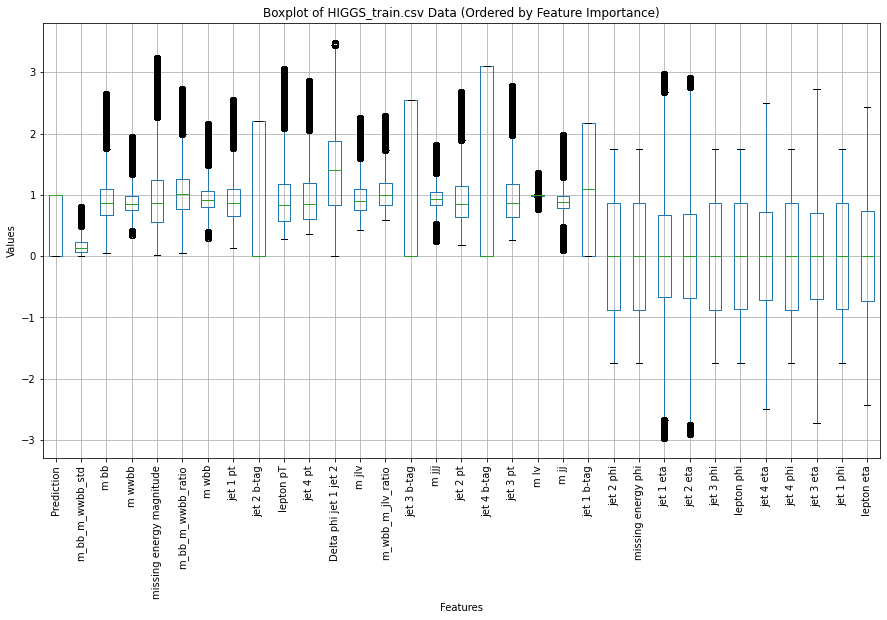

In [30]:
# Create a boxplot of the reordered columns
data_no_outliers_iqr_per_column.boxplot(rot=90, figsize=(15, 8)) # You can adjust the rotation and figure size as per your preference
plt.title("Boxplot of HIGGS_train.csv Data (Ordered by Feature Importance)")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()

Epoch 1/50
4308/4308 [==============================] - 21s 5ms/step - loss: 0.5513 - accuracy: 0.7138 - val_loss: 0.5201 - val_accuracy: 0.7369
Epoch 2/50
4308/4308 [==============================] - 21s 5ms/step - loss: 0.5122 - accuracy: 0.7421 - val_loss: 0.5046 - val_accuracy: 0.7475
Epoch 3/50
4308/4308 [==============================] - 21s 5ms/step - loss: 0.4982 - accuracy: 0.7513 - val_loss: 0.4933 - val_accuracy: 0.7545
Epoch 4/50
4308/4308 [==============================] - 20s 5ms/step - loss: 0.4886 - accuracy: 0.7576 - val_loss: 0.4898 - val_accuracy: 0.7567
Epoch 5/50
4308/4308 [==============================] - 22s 5ms/step - loss: 0.4809 - accuracy: 0.7627 - val_loss: 0.4808 - val_accuracy: 0.7627
Epoch 6/50
4308/4308 [==============================] - 23s 5ms/step - loss: 0.4743 - accuracy: 0.7672 - val_loss: 0.4739 - val_accuracy: 0.7676
Epoch 7/50
4308/4308 [==============================] - 22s 5ms/step - loss: 0.4686 - accuracy: 0.7710 - val_loss: 0.4711 - val_ac

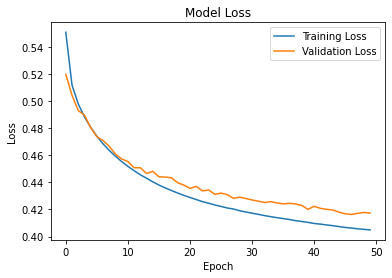

In [31]:

# Define the model architecture
model = Sequential([
    Dense(6*32, activation='relu'),
    Dense(4*32, activation='relu'),
    Dense(2*32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss function and optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model on the training set
history=model.fit(X_train_scaled, y_train, epochs=50, batch_size=1024, validation_data=(X_test_scaled, y_test))

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)

# Print the test accuracy
print('Test accuracy:', test_acc)
# Calculate and print the final training accuracy
_, train_acc = model.evaluate(X_train_scaled, y_train)
print('Final Training Accuracy:', train_acc)

# Plot the training loss and validation loss over epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()


In [36]:
# Get probabilities from the model
y_pred_probs = model.predict(X_test_scaled)

# Convert probabilities to binary values (0 or 1) using a threshold of 0.5
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Print the confusion matrix
confusion_mtx = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mtx)

# Print the classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


34460/34460 [==============================] - 39s 1ms/step
Confusion Matrix:
[[404574 109028]
 [106682 482407]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.79      0.79    513602
         1.0       0.82      0.82      0.82    589089

    accuracy                           0.80   1102691
   macro avg       0.80      0.80      0.80   1102691
weighted avg       0.80      0.80      0.80   1102691



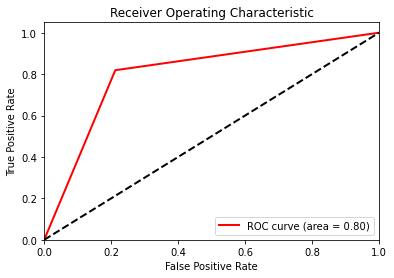

In [38]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [40]:
import pickle
import os

# Save the bagging_model to a file on desktop
filename = os.path.join(os.path.expanduser('~'), '/Users/reemh/OneDrive/Desktop', 'bestModel80_437.pkl') # Specify the full file path to your desktop directory
with open(filename, 'wb') as file:
    pickle.dump(model, file)
